In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [10]:
idb = pd.read_csv("C:/Users/Yash Tandon/Desktop/python course/ML projects/Iris-SpeciesEDA/Iris.csv")
idb.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
idb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [12]:
idb.drop('Id',axis = 1, inplace = True)

In [13]:
idb.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


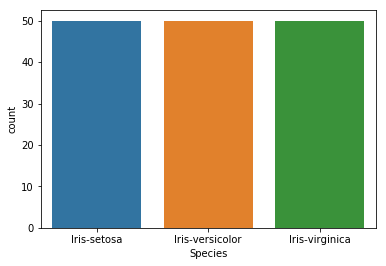

In [27]:
print(idb.groupby('Species').size())
sns.countplot(idb['Species'], label = 'count')
plt.show()

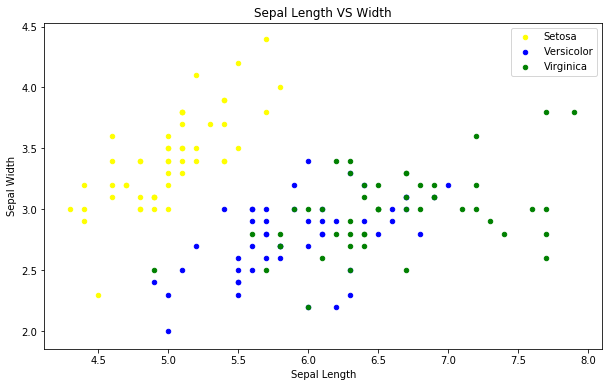

In [14]:
fig = idb[idb.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'yellow', label = 'Setosa')
idb[idb.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'blue', label = 'Versicolor', ax = fig)
idb[idb.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'green', label = 'Virginica', ax = fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length VS Width')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

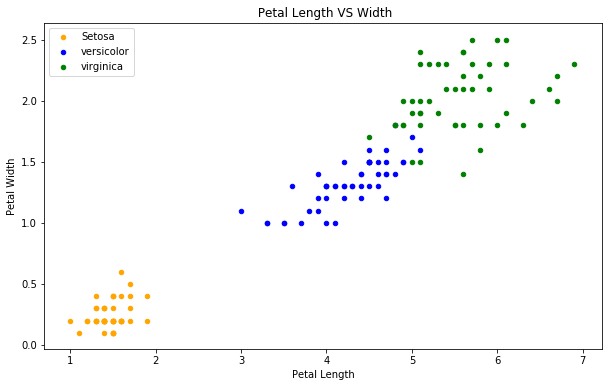

In [15]:
fig = idb[idb.Species == 'Iris-setosa'].plot.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'orange', label = 'Setosa')
idb[idb.Species=='Iris-versicolor'].plot.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'blue', label = 'versicolor', ax = fig)
idb[idb.Species=='Iris-virginica'].plot.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green', label = 'virginica', ax = fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

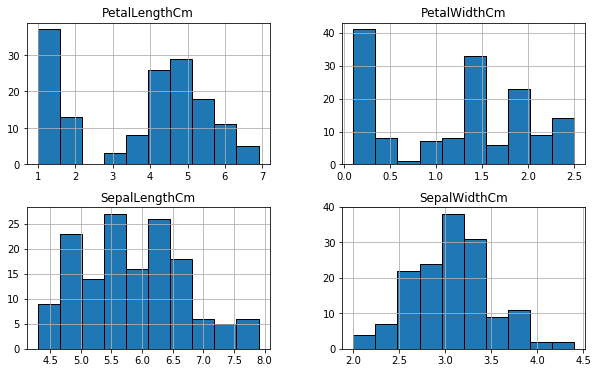

In [18]:
idb.hist(edgecolor = 'black')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [28]:
Acclist = []
y = idb.Species
x = idb.drop('Species', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

lr = LogisticRegression(C = 1).fit(x_train, y_train)
print('Accuracy on training set: {:.3f}'.format(lr.score(x_train, y_train) * 100))
print('Accuracy on test set: {:.3f}'.format(lr.score(x_test, y_test) * 100))
p = lr.score(x_test, y_test)*100
p1 = round(p, 2)
Acclist.append(p1)

Accuracy on training set: 96.190
Accuracy on test set: 95.556


C:\Users\Yash Tandon\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash Tandon\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


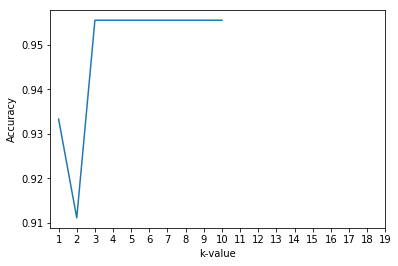

Maximum KNN Accuracy is: 95.556%


In [31]:
score = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    score.append(knn.score(x_test, y_test))
    
plt.plot(range(1,11), score)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

print('Maximum KNN Accuracy is: {:.3f}%'.format((max(score))*100))
p = max(score)*100
p1 = round(p, 2)
Acclist.append(p1)

In [35]:
svm = SVC()
svm.fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(svm.score(x_train, y_train)*100))
print('Test accuracy: {:.3f}'.format(svm.score(x_test, y_test)*100))
p = max(score)*100
p1 = round(p, 2)
Acclist.append(p1)

Training accuracy: 98.095
Test accuracy: 95.556


C:\Users\Yash Tandon\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
nb = GaussianNB()
nb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(nb.score(x_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(nb.score(x_test, y_test)*100))
p = nb.score(x_test, y_test)*100
p1 = round(p, 2)
Acclist.append(p1)

Accuracy on training set: 97.143
Accuracy on test set: 93.333
